In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
# Sample data: hours studied and exam score level
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Sleep_Hours': [8, 7, 6, 6, 5, 5, 4, 4, 3, 2],
    'Result': ['Fail', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass']
}

df = pd.DataFrame(data)


In [3]:
df['Result'] = df['Result'].map({'Fail': 0, 'Pass': 1})  # Encode labels


In [4]:
X = df[['Hours_Studied', 'Sleep_Hours']]  # Features
y = df['Result']                          # Target


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [6]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [7]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\shrut\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shrut\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shrut\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


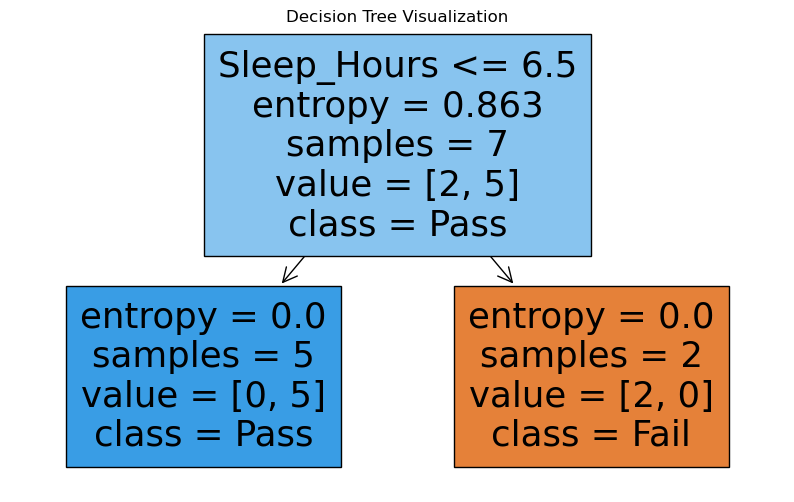

In [8]:
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Fail', 'Pass'])
plt.title("Decision Tree Visualization")
plt.show()


In [13]:
#  Load Dataset
df = pd.read_csv(r"C:\Users\shrut\Downloads\student3.csv")

In [12]:
# Clean and Prepare Data
df.columns = df.columns.str.strip()  # remove spaces in column names
df = df.dropna(subset=['marks', 'age', 'class'])



In [16]:
# Check unique values in 'class'
print("Unique class values:", df['class'].unique())


Unique class values: ['TE' 'BE' 'be' nan]


In [17]:
df['class'] = df['class'].astype(str).str.strip().str.upper()  # clean strings
df['class'] = df['class'].astype('category')  # convert to category
df['class_encoded'] = df['class'].cat.codes  # get numeric codes

In [18]:
print(df[['class', 'class_encoded']].drop_duplicates())

   class  class_encoded
0     TE              2
2     BE              0
14   NAN              1


In [21]:
X = df[['roll', 'name']]
y = df['class_encoded']

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
